# Climate coding challenge - Denver Colorado Annual Precipitation from 1948-2024

## Data Source

[This data][1] was gathered by [The Global Historical Climatology Network - Daily (GHCN-Daily/GHCNd) dataset][2]. This dataset integrates daily climate observations from approximately 30 different land surface data sources from around the world.

According to the [National Centers for Environmental Information][2], "The dataset cannot be used to quantify all aspects of climate variability and change without any additional processing. In general, the stations providing daily observations were not managed to meet the desired standards for climate monitoring. Rather, the stations were deployed to meet the demands of agriculture, hydrology, weather forecasting, aviation, etc."

For this analysis I selected station # USW00023062 located in Denver Central Park, Colorado. This station is the only one in the area with datasets going back over half a century, in this case to 1948. Unfortunately, the TOBS data was intermitent so I opted to look at precipitation between 1948 to 2024. 

[1]:  Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3, Denver Central Part, CO, Station USW00023062. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [accessed Sept 22, 2024].

[2]:  https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html "National Centers for Environmental Information Website"


## Access NCEI GHCNd Data from the internet using its API 🖥️ 📡 🖥️

The cell below contains the URL for the data you will use in this part
of the notebook. We created this URL by generating what is called an
**API endpoint** using the NCEI [API
documentation](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation).

> **Note**
>
> An **application programming interface** (API) is a way for two or
> more computer programs or components to communicate with each other.
> It is a type of software interface, offering a service to other pieces
> of software ([Wikipedia](https://en.wikipedia.org/wiki/API)).

First things first – you will need to import the `pandas` library to
access NCEI data through its URL:

In [3]:
# Import required packages
import pandas as pd

> **Your task:**
>
> 1.  Pick an expressive variable name for the URL.
> 2.  Reformat the URL so that it adheres to the [79-character PEP-8
>     line
>     limit](https://peps.python.org/pep-0008/#maximum-line-length). You
>     should see two vertical lines in each cell - don’t let your code
>     go past the second line.
> 3.  At the end of the cell where you define your url variable, **call
>     your variable (type out its name)** so it can be tested.

In [42]:
denver_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX,PRCP&stations=USW00023062'
    '&startDate=1948-01-01'
    '&endDate=2024-09-10'
    '&units=standard')
denver_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX,PRCP&stations=USW00023062&startDate=1948-01-01&endDate=2024-09-10&units=standard'

------------------------------------------------------------------------

## **Download and get started working with NCEI data**

Just like you did with the practice data, go ahead and use pandas to
import data from your API URL into Python. If you didn’t do it already,
you should import the pandas library **at the top of this notebook** so
that others who want to use your code can find it easily.

In [43]:
# Import data into Python from NCEI API
pd.read_csv(
    denver_url,
    index_col='DATE',
    parse_dates=True)

,STATION,PRCP,TMAX
DATE,,,
1948-01-01,USW00023062,0.0,43.0
1948-01-02,USW00023062,0.0,47.0
1948-01-03,USW00023062,0.0,56.0
1948-01-04,USW00023062,0.0,57.0
1948-01-05,USW00023062,0.0,53.0
...,...,...,...
2024-08-31,USW00023062,0.0,87.0
2024-09-02,USW00023062,0.0,87.0
2024-09-03,USW00023062,0.0,91.0


In [44]:
# Download the climate data
denver_df = pd.read_csv(
    denver_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
denver_df

,STATION,PRCP,TMAX
DATE,,,
1948-01-01,USW00023062,0.0,43.0
1948-01-02,USW00023062,0.0,47.0
1948-01-03,USW00023062,0.0,56.0
1948-01-04,USW00023062,0.0,57.0
1948-01-05,USW00023062,0.0,53.0
...,...,...,...
2024-08-31,USW00023062,0.0,87.0
2024-09-02,USW00023062,0.0,87.0
2024-09-03,USW00023062,0.0,91.0


### Data Cleanup

In [46]:
denver_df = denver_df[['PRCP','TMAX']]
denver_df

,PRCP,TMAX
DATE,,
1948-01-01,0.0,43.0
1948-01-02,0.0,47.0
1948-01-03,0.0,56.0
1948-01-04,0.0,57.0
1948-01-05,0.0,53.0
...,...,...
2024-08-31,0.0,87.0
2024-09-02,0.0,87.0
2024-09-03,0.0,91.0


### Add Correct Units to the Data

In [47]:
denver_df_u = denver_df.rename(columns={
    'TMAX': 'TMAX_F',
    'PRCP': 'PRCP_in'
})

denver_df_u

,PRCP_in,TMAX_F
DATE,,
1948-01-01,0.0,43.0
1948-01-02,0.0,47.0
1948-01-03,0.0,56.0
1948-01-04,0.0,57.0
1948-01-05,0.0,53.0
...,...,...
2024-08-31,0.0,87.0
2024-09-02,0.0,87.0
2024-09-03,0.0,91.0


### Plot the Results

In [18]:
import holoviews as hv
import hvplot.pandas

<Axes: xlabel='DATE'>

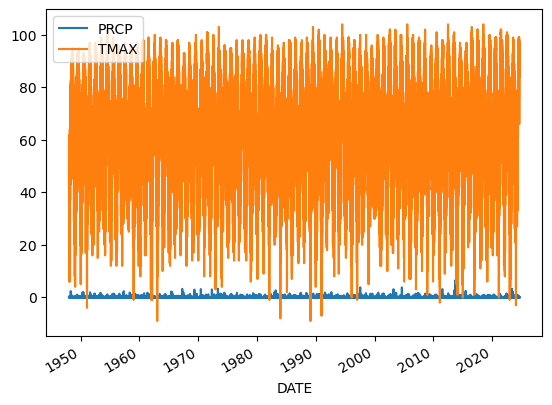

In [48]:
denver_df.plot()

<Axes: title={'center': 'Precipitation in Denver, CO between 1948 and 2024'}, xlabel='Year', ylabel='Precipitation (in.)'>

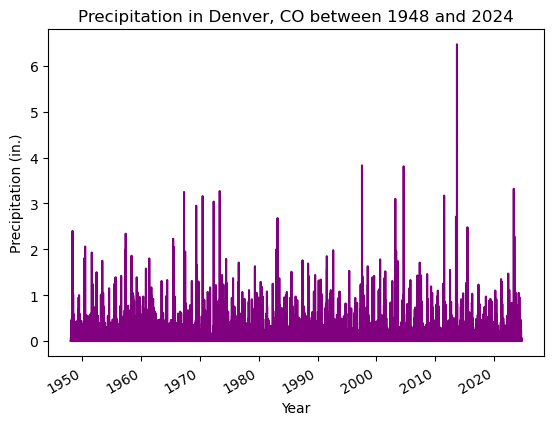

In [49]:
# Plot the data using .plot
denver_df.plot(
    y='PRCP',
    title='Precipitation in Denver, CO between 1948 and 2024',
    xlabel='Year',
    ylabel='Precipitation (in.)',
    legend=False,
    fontsize=10,
    color='purple',
    )


In [23]:
# Clean up data by changing it to Annual Average 
ann_denver_df = denver_df.resample('YS').mean()
ann_denver_df


,PRCP
DATE,
1948-01-01,0.034481
1949-01-01,0.045973
1950-01-01,0.038164
1951-01-01,0.053233
1952-01-01,0.036694
...,...
2020-01-01,0.026421
2021-01-01,0.037425
2022-01-01,0.039534


<Axes: title={'center': 'Precipitation in Denver, CO between 1948 and 2024'}, xlabel='Year', ylabel='Precipitation (in.)'>

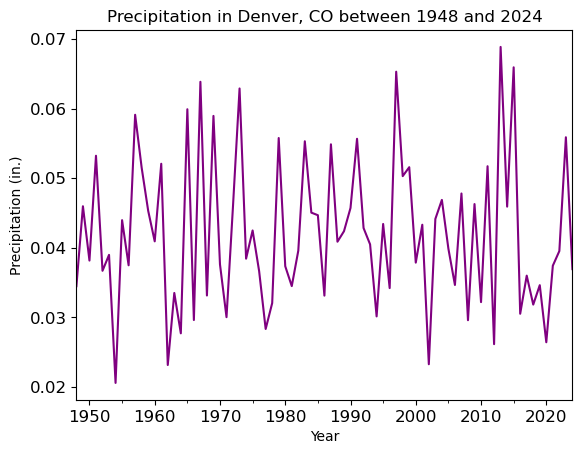

In [26]:
# Plot the annual data

ann_denver_df.plot(
    y='PRCP',
    title='Precipitation in Denver, CO between 1948 and 2024',
    xlabel='Year',
    ylabel='Precipitation (in.)',
    legend=False,
    fontsize=12,
    color='purple',
)

In [30]:
# Plot the annual data interactively
ann_temp_plot = ann_denver_df.hvplot(
    y='PRCP',
    title='Yearly Precipitation in Denver, CO (1948 and 2024)',
    xlabel='Year',
    ylabel='Precipitation (in.)',
    legend=False,
    fontsize=12,
    color='purple',
)
ann_temp_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (PRCP)

## Precipitation trend line for Denver, CO (1948-2024)

In [29]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [32]:
# Reset index to make 'Year' a column if it's currently the index
ann_denver_df = ann_denver_df.reset_index()

# Define the independent variable (X) and the dependent variable (y)
x = ann_denver_df[['DATE']]  # X should be 2D, so use double brackets
y = ann_denver_df['PRCP']

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: -1.6100211224462899e-22
Intercept: 0.04215777557928312


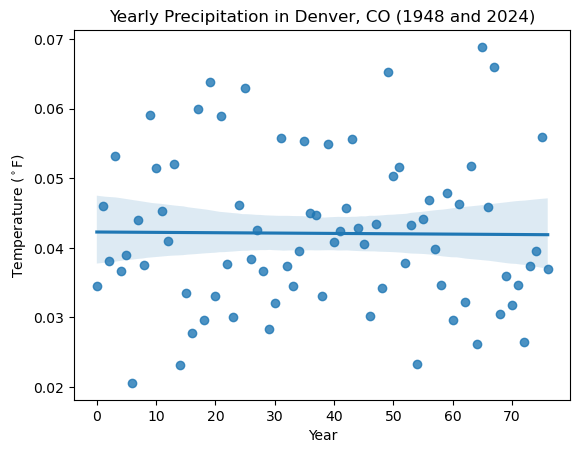

In [33]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_denver_df.index, 
    y=ann_denver_df.PRCP,
    )
# Set plot labels
ax.set(
    title='Yearly Precipitation in Denver, CO (1948 and 2024)',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)
# Display the plot without extra text
plt.show()